# Gamma Distribution: Visualization and Use Cases

The **Gamma distribution** is a continuous probability distribution defined on positive real numbers (0, ∞). It's parameterized by:
- **Shape (k or α)**: Controls the shape of the distribution
- **Rate (β) or Scale (θ = 1/β)**: Controls the spread

## Why This Matters

The Gamma distribution is fundamental in:
1. **Modeling waiting times** (time until k events occur)
2. **Bayesian statistics** (conjugate prior for Poisson rate)
3. **Negative Binomial** (Poisson with Gamma-distributed rate → overdispersion)
4. **Gene expression modeling** (continuous positive values)

## Table of Contents

1. [Basic Visualization](#1-basic-visualization)
2. [Shape and Rate Parameters](#2-shape-and-rate-parameters)
3. [Relationship to Other Distributions](#3-relationship-to-other-distributions)
4. [Bayesian Statistics: Gamma as Conjugate Prior](#4-bayesian-statistics-gamma-as-conjugate-prior)
5. [Quick Reference](#5-quick-reference)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Style
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['font.size'] = 12

## 1. Basic Visualization

### Parameterization Note

There are two common parameterizations:

| Convention | Parameters | Mean | Variance |
|------------|------------|------|----------|
| Shape-Rate | k (shape), β (rate) | k/β | k/β² |
| Shape-Scale | k (shape), θ (scale) | kθ | kθ² |

**scipy uses shape-scale**: `stats.gamma(a=shape, scale=scale)`

**numpy uses shape-scale**: `np.random.gamma(shape, scale)`

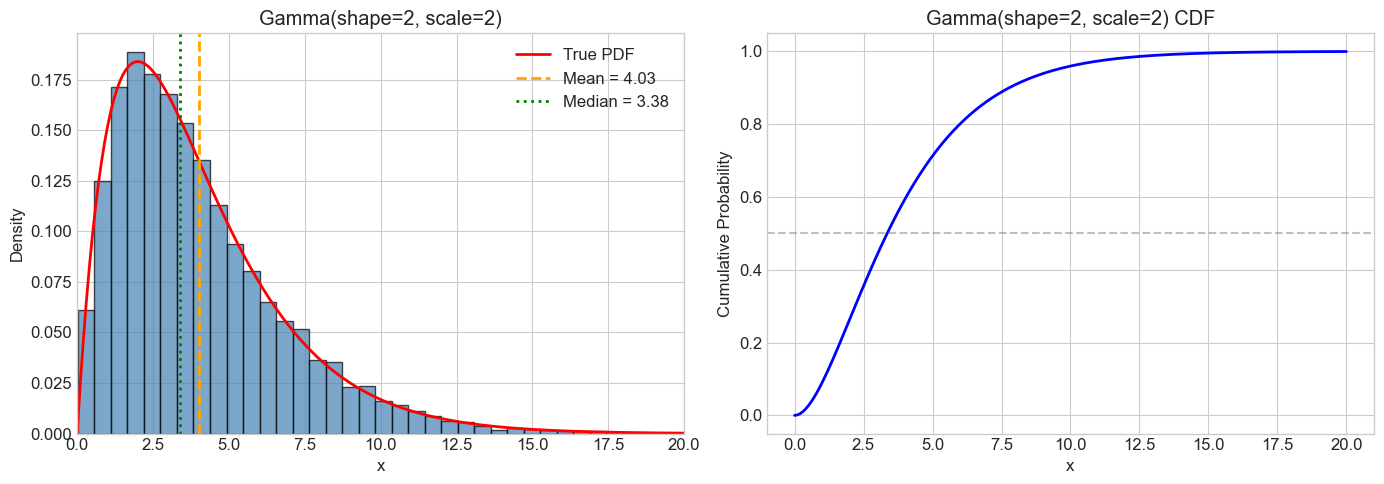

Gamma(shape=2, scale=2) Statistics:
  Mean:     4.0000  (= shape × scale)
  Variance: 8.0000  (= shape × scale²)
  Mode:     2.0000


In [2]:
# Basic Gamma distribution
shape = 2  # k or alpha
scale = 2  # theta (scale = 1/rate)

# Generate samples
np.random.seed(42)
samples = np.random.gamma(shape, scale, 10000)

# Create x values for PDF
x = np.linspace(0, 20, 200)
pdf = stats.gamma.pdf(x, a=shape, scale=scale)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(samples, bins=50, density=True, alpha=0.7, edgecolor='black', color='steelblue')
axes[0].plot(x, pdf, 'r-', lw=2, label='True PDF')
axes[0].axvline(samples.mean(), color='orange', linestyle='--', lw=2, label=f'Mean = {samples.mean():.2f}')
axes[0].axvline(np.median(samples), color='green', linestyle=':', lw=2, label=f'Median = {np.median(samples):.2f}')
axes[0].set_xlabel('x')
axes[0].set_ylabel('Density')
axes[0].set_title(f'Gamma(shape={shape}, scale={scale})')
axes[0].legend()
axes[0].set_xlim(0, 20)

# CDF
cdf = stats.gamma.cdf(x, a=shape, scale=scale)
axes[1].plot(x, cdf, 'b-', lw=2)
axes[1].axhline(0.5, color='gray', linestyle='--', alpha=0.5)
axes[1].set_xlabel('x')
axes[1].set_ylabel('Cumulative Probability')
axes[1].set_title(f'Gamma(shape={shape}, scale={scale}) CDF')

plt.tight_layout()
plt.show()

# Key statistics
print(f"Gamma(shape={shape}, scale={scale}) Statistics:")
print(f"  Mean:     {stats.gamma.mean(a=shape, scale=scale):.4f}  (= shape × scale)")
print(f"  Variance: {stats.gamma.var(a=shape, scale=scale):.4f}  (= shape × scale²)")
print(f"  Mode:     {(shape - 1) * scale:.4f}" if shape >= 1 else "  Mode: 0 (shape < 1)")

## 2. Shape and Rate Parameters

### Effect of Shape (k)

- **k < 1**: Exponential decay from 0 (J-shaped)
- **k = 1**: Exponential distribution
- **k > 1**: Bell-shaped, right-skewed
- **k → ∞**: Approaches normal distribution

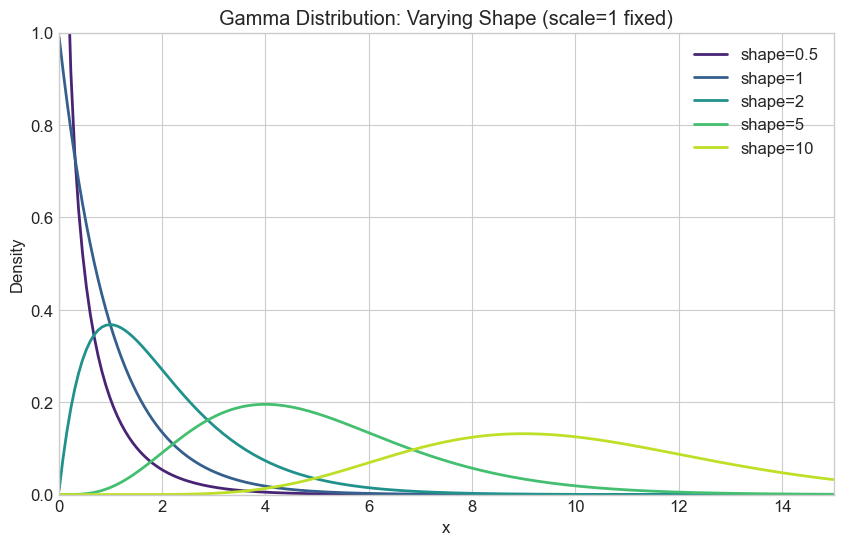

Shape effects:
  shape < 1: J-shaped (mode at 0)
  shape = 1: Exponential distribution
  shape > 1: Bell-shaped, right-skewed


In [3]:
# Varying shape parameter
x = np.linspace(0.01, 15, 200)
scale = 1  # Fixed scale

shapes = [0.5, 1, 2, 5, 10]

fig, ax = plt.subplots(figsize=(10, 6))

colors = plt.cm.viridis(np.linspace(0.1, 0.9, len(shapes)))

for shape, color in zip(shapes, colors):
    pdf = stats.gamma.pdf(x, a=shape, scale=scale)
    ax.plot(x, pdf, lw=2, color=color, label=f'shape={shape}')

ax.set_xlabel('x')
ax.set_ylabel('Density')
ax.set_title(f'Gamma Distribution: Varying Shape (scale={scale} fixed)')
ax.legend()
ax.set_xlim(0, 15)
ax.set_ylim(0, 1)

plt.show()

print("Shape effects:")
print("  shape < 1: J-shaped (mode at 0)")
print("  shape = 1: Exponential distribution")
print("  shape > 1: Bell-shaped, right-skewed")

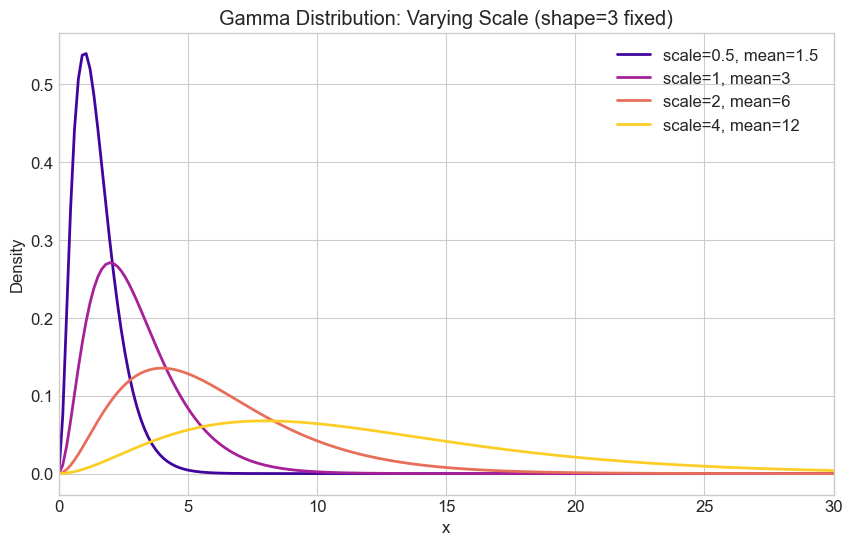

Scale effects:
  Larger scale → distribution stretches right
  Mean = shape × scale
  Variance = shape × scale²


In [4]:
# Varying scale parameter
x = np.linspace(0.01, 30, 200)
shape = 3  # Fixed shape

scales = [0.5, 1, 2, 4]

fig, ax = plt.subplots(figsize=(10, 6))

colors = plt.cm.plasma(np.linspace(0.1, 0.9, len(scales)))

for scale, color in zip(scales, colors):
    pdf = stats.gamma.pdf(x, a=shape, scale=scale)
    mean = shape * scale
    ax.plot(x, pdf, lw=2, color=color, label=f'scale={scale}, mean={mean}')

ax.set_xlabel('x')
ax.set_ylabel('Density')
ax.set_title(f'Gamma Distribution: Varying Scale (shape={shape} fixed)')
ax.legend()
ax.set_xlim(0, 30)

plt.show()

print("Scale effects:")
print("  Larger scale → distribution stretches right")
print("  Mean = shape × scale")
print("  Variance = shape × scale²")

### Comprehensive Parameter Grid

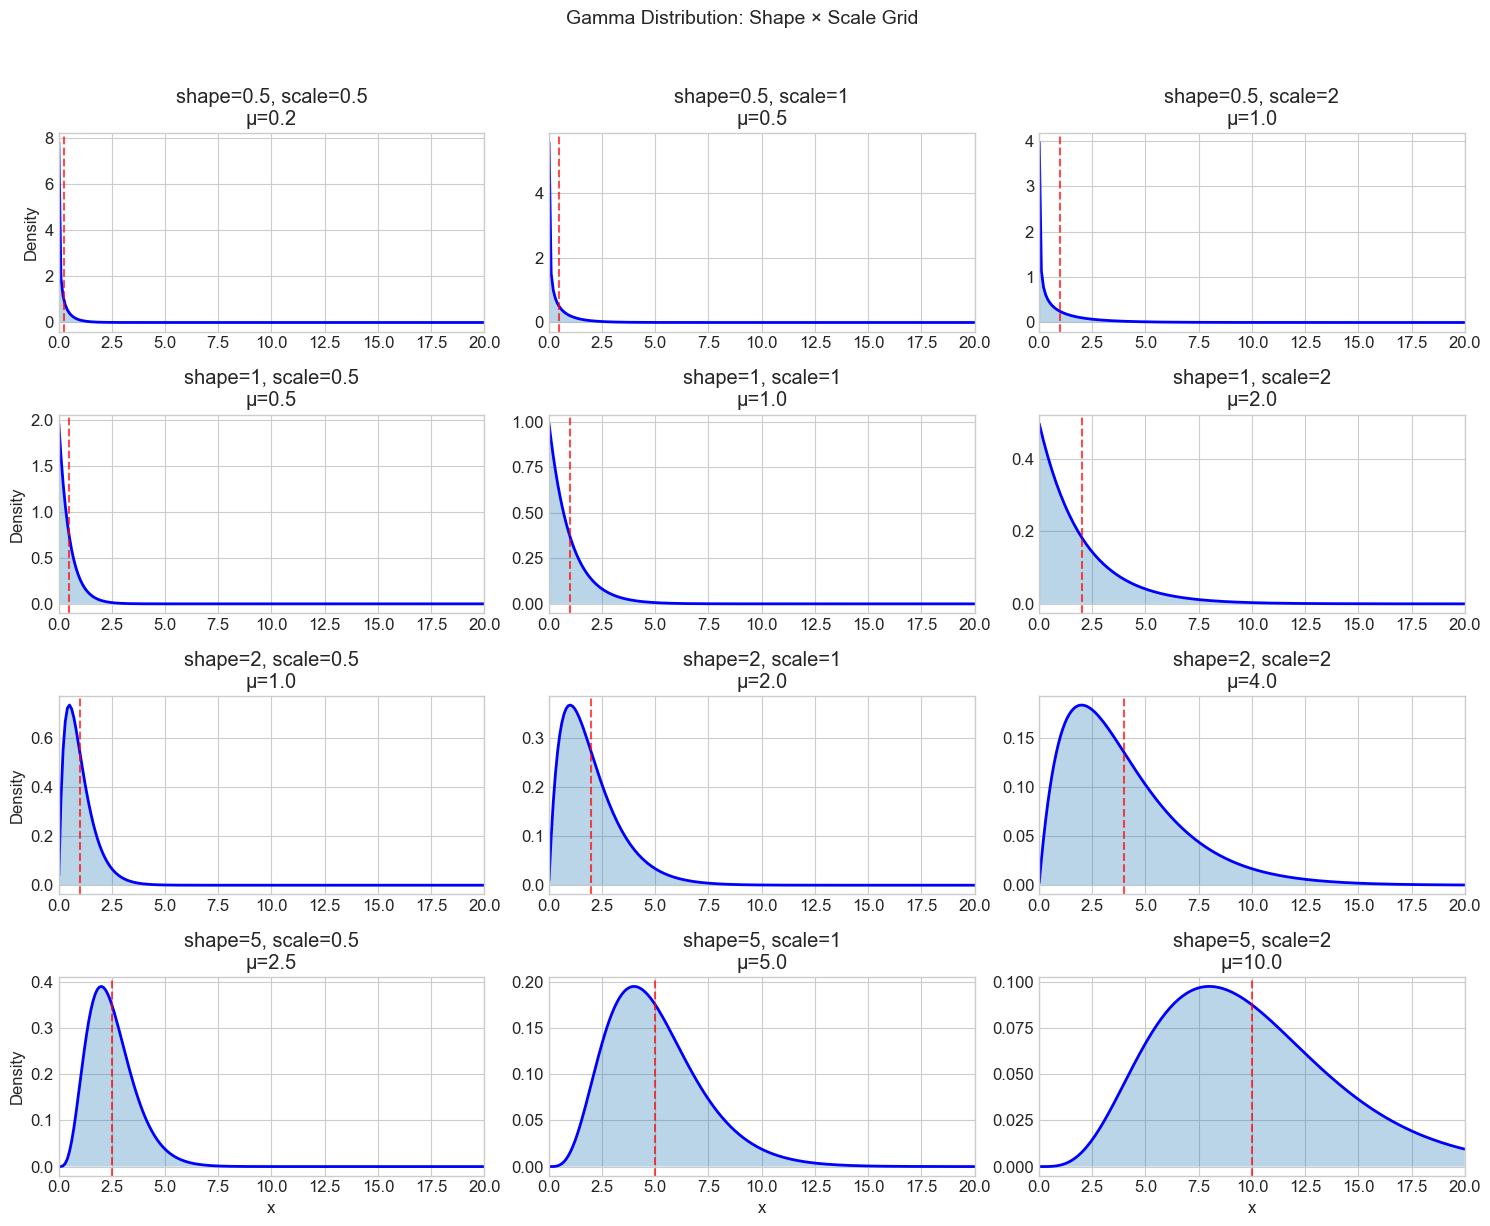

In [5]:
# Grid of shape × scale combinations
shapes = [0.5, 1, 2, 5]
scales = [0.5, 1, 2]

fig, axes = plt.subplots(len(shapes), len(scales), figsize=(15, 12))

x = np.linspace(0.01, 20, 200)

for i, shape in enumerate(shapes):
    for j, scale in enumerate(scales):
        ax = axes[i, j]
        pdf = stats.gamma.pdf(x, a=shape, scale=scale)
        ax.plot(x, pdf, 'b-', lw=2)
        ax.fill_between(x, pdf, alpha=0.3)
        
        mean = shape * scale
        ax.axvline(mean, color='red', linestyle='--', alpha=0.7)
        
        ax.set_title(f'shape={shape}, scale={scale}\nμ={mean:.1f}')
        ax.set_xlim(0, 20)
        
        if i == len(shapes) - 1:
            ax.set_xlabel('x')
        if j == 0:
            ax.set_ylabel('Density')

plt.suptitle('Gamma Distribution: Shape × Scale Grid', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

## 3. Relationship to Other Distributions

The Gamma distribution is connected to many other distributions:

| Relationship | Description |
|--------------|-------------|
| **Exponential** | Gamma(1, β) = Exponential(β) |
| **Chi-squared** | Gamma(k/2, 2) = χ²(k) |
| **Erlang** | Gamma with integer shape |
| **Beta** | Beta = Gamma₁ / (Gamma₁ + Gamma₂) |
| **Negative Binomial** | Poisson with Gamma-distributed rate |

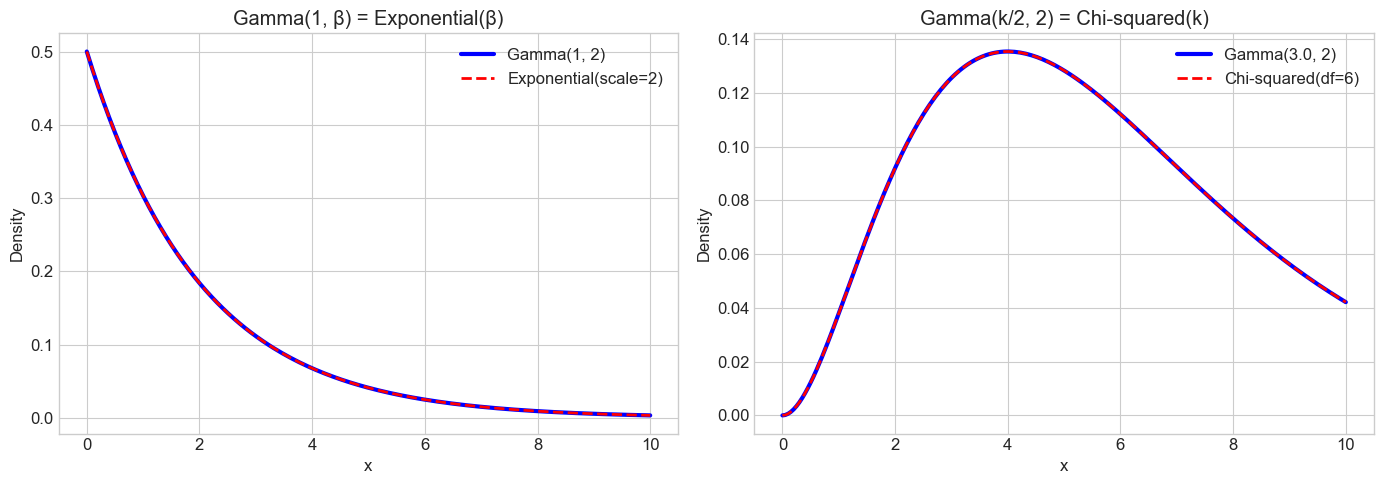

In [6]:
# Gamma(1, β) = Exponential(β)
x = np.linspace(0, 10, 200)
scale = 2

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gamma(1, scale) vs Exponential
gamma_pdf = stats.gamma.pdf(x, a=1, scale=scale)
exp_pdf = stats.expon.pdf(x, scale=scale)

axes[0].plot(x, gamma_pdf, 'b-', lw=3, label='Gamma(1, 2)')
axes[0].plot(x, exp_pdf, 'r--', lw=2, label='Exponential(scale=2)')
axes[0].set_xlabel('x')
axes[0].set_ylabel('Density')
axes[0].set_title('Gamma(1, β) = Exponential(β)')
axes[0].legend()

# Gamma(k/2, 2) vs Chi-squared
k = 6  # degrees of freedom
gamma_pdf = stats.gamma.pdf(x, a=k/2, scale=2)
chi2_pdf = stats.chi2.pdf(x, df=k)

axes[1].plot(x, gamma_pdf, 'b-', lw=3, label=f'Gamma({k/2}, 2)')
axes[1].plot(x, chi2_pdf, 'r--', lw=2, label=f'Chi-squared(df={k})')
axes[1].set_xlabel('x')
axes[1].set_ylabel('Density')
axes[1].set_title('Gamma(k/2, 2) = Chi-squared(k)')
axes[1].legend()

plt.tight_layout()
plt.show()

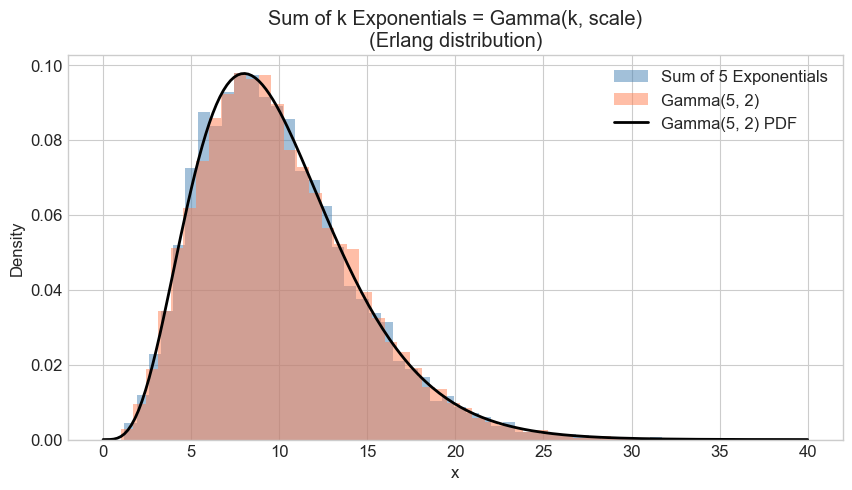

Sum of Exponentials: mean = 9.96, var = 19.95
Gamma(5, 2):         mean = 10.06, var = 20.09
Theory:              mean = 10.00, var = 20.00


In [7]:
# Sum of Exponentials = Gamma (Erlang)
# If X₁, X₂, ..., Xₖ ~ Exp(β), then X₁ + X₂ + ... + Xₖ ~ Gamma(k, β)

np.random.seed(42)
n_samples = 10000
k = 5  # number of exponentials to sum
scale = 2

# Sum of k exponentials
exp_samples = np.random.exponential(scale, (n_samples, k))
sum_exp = exp_samples.sum(axis=1)

# Direct Gamma samples
gamma_samples = np.random.gamma(k, scale, n_samples)

x = np.linspace(0, 40, 200)
gamma_pdf = stats.gamma.pdf(x, a=k, scale=scale)

fig, ax = plt.subplots(figsize=(10, 5))

ax.hist(sum_exp, bins=50, density=True, alpha=0.5, label='Sum of 5 Exponentials', color='steelblue')
ax.hist(gamma_samples, bins=50, density=True, alpha=0.5, label='Gamma(5, 2)', color='coral')
ax.plot(x, gamma_pdf, 'k-', lw=2, label='Gamma(5, 2) PDF')

ax.set_xlabel('x')
ax.set_ylabel('Density')
ax.set_title('Sum of k Exponentials = Gamma(k, scale)\n(Erlang distribution)')
ax.legend()

plt.show()

print(f"Sum of Exponentials: mean = {sum_exp.mean():.2f}, var = {sum_exp.var():.2f}")
print(f"Gamma(5, 2):         mean = {gamma_samples.mean():.2f}, var = {gamma_samples.var():.2f}")
print(f"Theory:              mean = {k * scale:.2f}, var = {k * scale**2:.2f}")

## 4. Bayesian Statistics: Gamma as Conjugate Prior

The Gamma distribution is the **conjugate prior** for the Poisson rate parameter:

$$\text{Gamma prior} + \text{Poisson data} = \text{Gamma posterior}$$

### Example: Estimating Gene Expression Rate

In scRNA-seq, counts are often modeled as Poisson. We can use a Gamma prior on the rate.

> 📖 **See also:** `02_gamma_poisson_conjugacy.md` for a detailed derivation of the conjugate update rule and how Gamma arises naturally in Poisson processes.

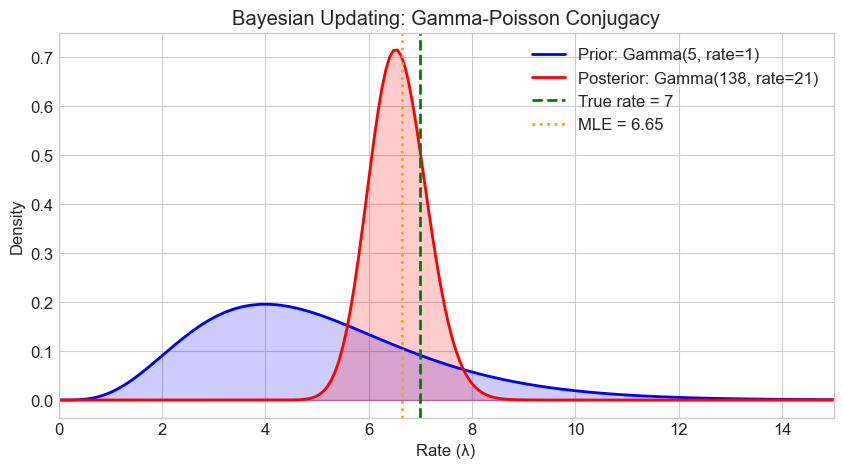

Data: 20 cells, total counts = 133, mean = 6.65

Prior mean:     5.00
Posterior mean: 6.57
True rate:      7


In [8]:
# Bayesian updating: Gamma-Poisson conjugacy

# Prior: We expect a rate around 5, with some uncertainty
prior_shape = 5
prior_rate = 1  # rate = 1/scale
prior_scale = 1 / prior_rate

# Data: We observe counts from n cells
np.random.seed(42)
true_rate = 7  # True underlying rate
n_cells = 20
observed_counts = np.random.poisson(true_rate, n_cells)
total_counts = observed_counts.sum()

# Posterior (conjugate update)
# Posterior shape = prior_shape + sum(counts)
# Posterior rate = prior_rate + n
posterior_shape = prior_shape + total_counts
posterior_rate = prior_rate + n_cells
posterior_scale = 1 / posterior_rate

x = np.linspace(0, 15, 200)

fig, ax = plt.subplots(figsize=(10, 5))

# Prior
prior_pdf = stats.gamma.pdf(x, a=prior_shape, scale=prior_scale)
ax.plot(x, prior_pdf, 'b-', lw=2, label=f'Prior: Gamma({prior_shape}, rate={prior_rate})')
ax.fill_between(x, prior_pdf, alpha=0.2, color='blue')

# Posterior
posterior_pdf = stats.gamma.pdf(x, a=posterior_shape, scale=posterior_scale)
ax.plot(x, posterior_pdf, 'r-', lw=2, label=f'Posterior: Gamma({posterior_shape}, rate={posterior_rate})')
ax.fill_between(x, posterior_pdf, alpha=0.2, color='red')

# True rate
ax.axvline(true_rate, color='green', linestyle='--', lw=2, label=f'True rate = {true_rate}')

# MLE
mle = observed_counts.mean()
ax.axvline(mle, color='orange', linestyle=':', lw=2, label=f'MLE = {mle:.2f}')

ax.set_xlabel('Rate (λ)')
ax.set_ylabel('Density')
ax.set_title('Bayesian Updating: Gamma-Poisson Conjugacy')
ax.legend()
ax.set_xlim(0, 15)

plt.show()

print(f"Data: {n_cells} cells, total counts = {total_counts}, mean = {mle:.2f}")
print(f"\nPrior mean:     {prior_shape / prior_rate:.2f}")
print(f"Posterior mean: {posterior_shape / posterior_rate:.2f}")
print(f"True rate:      {true_rate}")

### Connection to Negative Binomial

This is crucial: **Poisson with Gamma-distributed rate = Negative Binomial**

This is covered in detail in the next notebook (`03_negative_binomial.ipynb`).

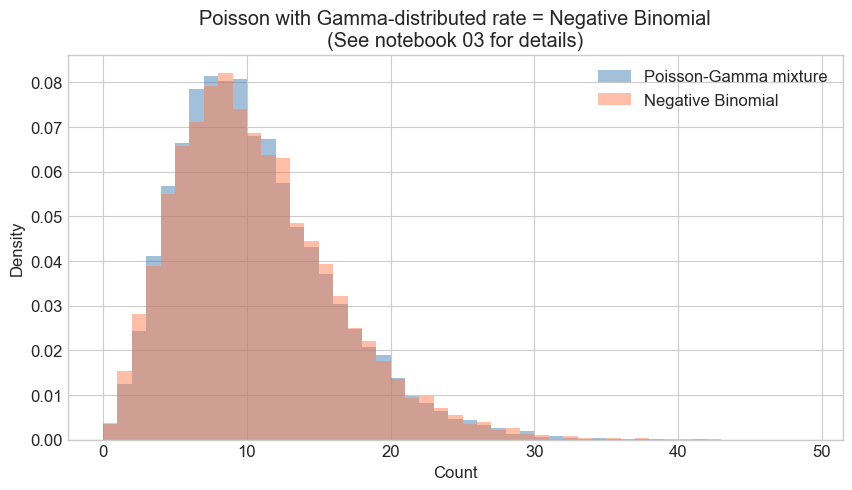

Poisson-Gamma: mean = 10.05, var = 29.62
Neg Binomial:  mean = 10.15, var = 30.65

Note: Variance > Mean (overdispersion!)


In [9]:
# Preview: Poisson-Gamma mixture = Negative Binomial
np.random.seed(42)
n_samples = 10000

# Gamma-distributed rates
shape = 5  # This becomes 'r' in NegBinom
scale = 2
rates = np.random.gamma(shape, scale, n_samples)

# Poisson counts with those rates
poisson_gamma_counts = np.array([np.random.poisson(r) for r in rates])

# Direct Negative Binomial
# NB parameterization: r (successes), p (success prob)
# When Poisson rate ~ Gamma(shape, scale), we get NB with:
# r = shape, p = 1/(1 + scale)
r = shape
p = 1 / (1 + scale)
nb_counts = np.random.negative_binomial(r, p, n_samples)

fig, ax = plt.subplots(figsize=(10, 5))

bins = np.arange(0, 50)
ax.hist(poisson_gamma_counts, bins=bins, density=True, alpha=0.5, 
        label='Poisson-Gamma mixture', color='steelblue')
ax.hist(nb_counts, bins=bins, density=True, alpha=0.5, 
        label='Negative Binomial', color='coral')

ax.set_xlabel('Count')
ax.set_ylabel('Density')
ax.set_title('Poisson with Gamma-distributed rate = Negative Binomial\n(See notebook 03 for details)')
ax.legend()

plt.show()

print(f"Poisson-Gamma: mean = {poisson_gamma_counts.mean():.2f}, var = {poisson_gamma_counts.var():.2f}")
print(f"Neg Binomial:  mean = {nb_counts.mean():.2f}, var = {nb_counts.var():.2f}")
print(f"\nNote: Variance > Mean (overdispersion!)")

## 5. Quick Reference

### Parameterization

| Library | Function | Parameters |
|---------|----------|------------|
| scipy | `stats.gamma(a, scale)` | a=shape, scale=1/rate |
| numpy | `np.random.gamma(shape, scale)` | shape, scale=1/rate |

### Key Formulas

```
Mean = shape × scale = shape / rate
Variance = shape × scale² = shape / rate²
Mode = (shape - 1) × scale  [when shape ≥ 1]

Bayesian update (Poisson likelihood):
  Prior: Gamma(α, β)  [shape, rate]
  Data: n observations with sum S
  Posterior: Gamma(α + S, β + n)
```

### Shape Effects

| Shape | Distribution Shape |
|-------|-------------------|
| < 1 | J-shaped (mode at 0) |
| = 1 | Exponential |
| > 1 | Bell-shaped, right-skewed |
| → ∞ | Approaches Normal |

In [10]:
# Quick helper function
def gamma_summary(shape, scale):
    """Print summary statistics for a Gamma distribution."""
    dist = stats.gamma(a=shape, scale=scale)
    rate = 1 / scale
    print(f"Gamma(shape={shape}, scale={scale}) [rate={rate}] Summary:")
    print(f"  Mean:     {dist.mean():.4f}  (= shape × scale)")
    print(f"  Variance: {dist.var():.4f}  (= shape × scale²)")
    print(f"  Std Dev:  {dist.std():.4f}")
    if shape >= 1:
        print(f"  Mode:     {(shape - 1) * scale:.4f}")
    else:
        print(f"  Mode:     0 (shape < 1)")
    print(f"  95% CI:   [{dist.ppf(0.025):.4f}, {dist.ppf(0.975):.4f}]")

# Example
gamma_summary(5, 2)

Gamma(shape=5, scale=2) [rate=0.5] Summary:
  Mean:     10.0000  (= shape × scale)
  Variance: 20.0000  (= shape × scale²)
  Std Dev:  4.4721
  Mode:     8.0000
  95% CI:   [3.2470, 20.4832]


---

## Summary

The Gamma distribution is essential for:

1. **Modeling positive continuous quantities** (rates, times, concentrations)
2. **Bayesian inference** as conjugate prior for Poisson rate
3. **Understanding overdispersion** via Poisson-Gamma mixture
4. **Connecting distributions** (Exponential, Chi-squared, Negative Binomial)

**Next:** See `03_negative_binomial.ipynb` for how Gamma-distributed rates lead to overdispersed count data.